In [1]:
from prophet import Prophet
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/DOM/Load Actuals/Processed/Aggregated/load.csv', parse_dates=['DATE'])
df.rename(columns={'DATE': 'ds','MW':'y'},inplace=True)

In [3]:
m = Prophet()
m.fit(df)

In [4]:
future = m.make_future_dataframe(periods=8760, freq='H')
future.tail()

,ds
96403,2020-12-30 19:00:00
96404,2020-12-30 20:00:00
96405,2020-12-30 21:00:00
96406,2020-12-30 22:00:00
96407,2020-12-30 23:00:00


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96403,2020-12-30 19:00:00,14282.630786,10269.386184,17681.479970
96404,2020-12-30 20:00:00,13972.345762,9518.560348,17518.352325
96405,2020-12-30 21:00:00,13390.622375,9114.827000,17059.743945
96406,2020-12-30 22:00:00,12661.948002,8508.499800,16225.892593
96407,2020-12-30 23:00:00,11938.834726,7689.525880,15622.613456


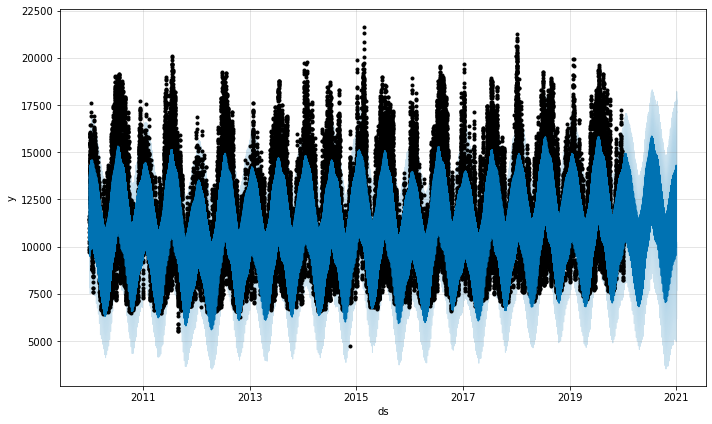

In [6]:
fig1 = m.plot(forecast)

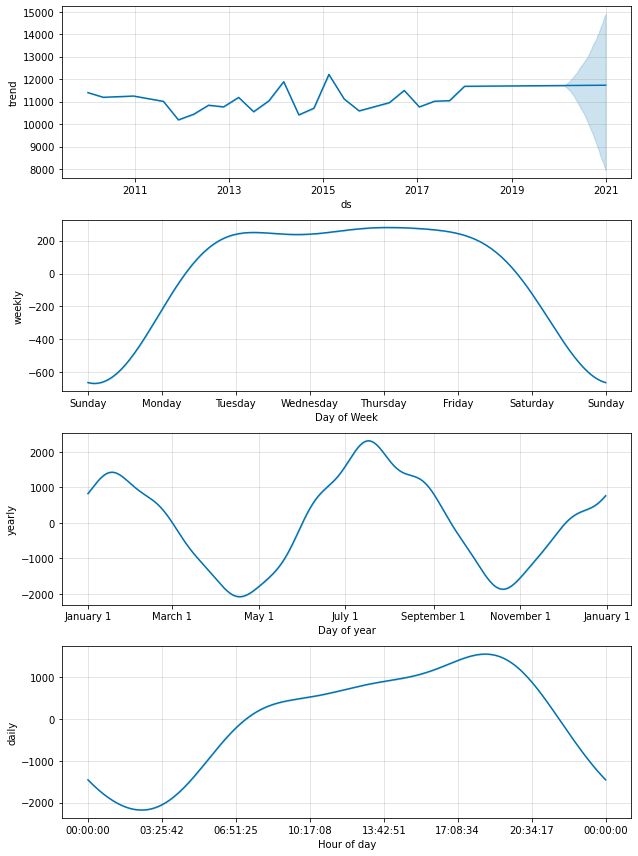

In [7]:
fig2 = m.plot_components(forecast)

In [8]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01 00:00:00,11399.444511,8823.904366,12992.854905,11399.444511,11399.444511,-400.198682,-400.198682,-400.198682,-1455.413296,...,243.673469,243.673469,243.673469,811.541146,811.541146,811.541146,0.0,0.0,0.0,10999.245829
1,2010-01-01 01:00:00,11399.369996,8447.443803,12675.823685,11399.369996,11399.369996,-849.701308,-849.701308,-849.701308,-1902.243087,...,238.949920,238.949920,238.949920,813.591859,813.591859,813.591859,0.0,0.0,0.0,10549.668688
2,2010-01-01 02:00:00,11399.295481,8380.865830,12452.219779,11399.295481,11399.295481,-1097.818073,-1097.818073,-1097.818073,-2147.110593,...,233.647132,233.647132,233.647132,815.645388,815.645388,815.645388,0.0,0.0,0.0,10301.477409
3,2010-01-01 03:00:00,11399.220967,8360.938578,12359.059736,11399.220967,11399.220967,-1096.731159,-1096.731159,-1096.731159,-2142.139350,...,227.706491,227.706491,227.706491,817.701700,817.701700,817.701700,0.0,0.0,0.0,10302.489808
4,2010-01-01 04:00:00,11399.146452,8521.038733,12708.720222,11399.146452,11399.146452,-814.775482,-814.775482,-814.775482,-1855.605003,...,221.068762,221.068762,221.068762,819.760760,819.760760,819.760760,0.0,0.0,0.0,10584.370970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96403,2020-12-30 19:00:00,11729.040739,10269.386184,17681.479970,7952.676860,14886.693184,2553.590047,2553.590047,2553.590047,1511.976214,...,276.385146,276.385146,276.385146,765.228688,765.228688,765.228688,0.0,0.0,0.0,14282.630786
96404,2020-12-30 20:00:00,11729.042570,9518.560348,17518.352325,7952.198426,14887.521430,2243.303192,2243.303192,2243.303192,1198.595724,...,277.501930,277.501930,277.501930,767.205537,767.205537,767.205537,0.0,0.0,0.0,13972.345762
96405,2020-12-30 21:00:00,11729.044402,9114.827000,17059.743945,7951.719992,14888.349676,1661.577973,1661.577973,1661.577973,613.966068,...,278.425962,278.425962,278.425962,769.185943,769.185943,769.185943,0.0,0.0,0.0,13390.622375
96406,2020-12-30 22:00:00,11729.046233,8508.499800,16225.892593,7951.241558,14889.177922,932.901769,932.901769,932.901769,-117.425122,...,279.157017,279.157017,279.157017,771.169874,771.169874,771.169874,0.0,0.0,0.0,12661.948002


In [9]:
import datetime

start_date_mask = df['ds'].dt.date >= datetime.date(2019, 1, 1)
end_date_mask = df['ds'].dt.date < datetime.date(2019, 3, 8)
df_subset = df[start_date_mask & end_date_mask]

def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

train, test = train_test_split(df_subset, 168)

In [10]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=168, freq='H')

In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1579,2019-03-07 19:00:00,12538.358779,10590.003925,14648.453128
1580,2019-03-07 20:00:00,12265.481573,10185.174060,14140.602880
1581,2019-03-07 21:00:00,11717.766822,9798.043637,13750.097596
1582,2019-03-07 22:00:00,11159.961385,9199.735600,13136.350088
1583,2019-03-07 23:00:00,10751.269970,8650.153570,12726.693931


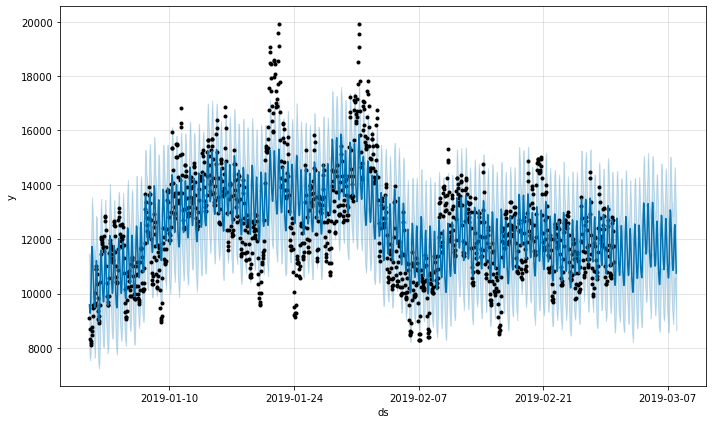

In [13]:
fig3 = m.plot(forecast)

In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01 00:00:00,9878.365377,7783.792242,11478.594757,9878.365377,9878.365377,-294.144934,-294.144934,-294.144934,-887.341520,-887.341520,-887.341520,593.196586,593.196586,593.196586,0.0,0.0,0.0,9584.220443
1,2019-01-01 01:00:00,9891.673141,7649.224606,11120.123125,9891.673141,9891.673141,-504.193991,-504.193991,-504.193991,-1077.950971,-1077.950971,-1077.950971,573.756980,573.756980,573.756980,0.0,0.0,0.0,9387.479150
2,2019-01-01 02:00:00,9904.980904,7547.013659,11040.570262,9904.980904,9904.980904,-627.542180,-627.542180,-627.542180,-1178.834170,-1178.834170,-1178.834170,551.291990,551.291990,551.291990,0.0,0.0,0.0,9277.438724
3,2019-01-01 03:00:00,9918.288668,7698.733262,11123.888248,9918.288668,9918.288668,-515.753431,-515.753431,-515.753431,-1041.826464,-1041.826464,-1041.826464,526.073033,526.073033,526.073033,0.0,0.0,0.0,9402.535237
4,2019-01-01 04:00:00,9931.596431,8100.796296,11600.903055,9931.596431,9931.596431,-49.970273,-49.970273,-49.970273,-548.366477,-548.366477,-548.366477,498.396204,498.396204,498.396204,0.0,0.0,0.0,9881.626159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2019-03-07 19:00:00,11541.852162,10590.003925,14648.453128,10728.482092,12358.756332,996.506617,996.506617,996.506617,1060.127189,1060.127189,1060.127189,-63.620572,-63.620572,-63.620572,0.0,0.0,0.0,12538.358779
1580,2019-03-07 20:00:00,11540.921129,10185.174060,14140.602880,10721.153728,12368.839537,724.560444,724.560444,724.560444,811.377833,811.377833,811.377833,-86.817389,-86.817389,-86.817389,0.0,0.0,0.0,12265.481573
1581,2019-03-07 21:00:00,11539.990095,9798.043637,13750.097596,10709.714042,12378.922741,177.776726,177.776726,177.776726,287.244976,287.244976,287.244976,-109.468250,-109.468250,-109.468250,0.0,0.0,0.0,11717.766822
1582,2019-03-07 22:00:00,11539.059062,9199.735600,13136.350088,10697.826172,12388.885148,-379.097677,-379.097677,-379.097677,-247.749092,-247.749092,-247.749092,-131.348585,-131.348585,-131.348585,0.0,0.0,0.0,11159.961385


In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

In [16]:
error = measure_rmse(test['y'], forecast['yhat'][(len(forecast['yhat'])-len(test['y'])):])

In [17]:
error

1656.0051247787949

In [18]:
from sklearn.metrics import mean_absolute_percentage_error

week_ahead_mape = mean_absolute_percentage_error(test['y'], forecast['yhat'][(len(forecast['yhat'])-len(test['y'])):])
week_ahead_mape

0.09756963263843951

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(test['date'],test['mw'].values)
plt.plot(test['date'], forecast['yhat'][(len(forecast['yhat'])-len(test['y'])):])
plt.legend(('Data', 'Predictions'), fontsize=16)

NameError: name 'plt' is not defined